<a href="https://www.bigdatauniversity.com"><img src = "https://ibm.box.com/shared/static/cw2c7r3o20w9zn8gkecaeyjhgw3xdgbj.png" width = 400, align = "center"></a>

<h1 align=center><font size = 5> Random Forest in R: Exercise </font></h1>

In [1]:
# Install the package "randomForest"./resources/Random-Forests-in-R.ipynb
install.packages("randomForest")
library(randomForest)

Warning message in install.packages("randomForest"):
“installation of package ‘randomForest’ had non-zero exit status”Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


In the description example of Random Forest, we used the **iris** database to understand how this algorithm can be used for classification. In the following exercise, we are going to learn how to use Random Forest for regression analysis. In terms of regression analysis using random forest method, we may see instances where the individual trees are **weak** predictors, however the final combined random forest model is much **stronger**, thus being able to give better predictions. The major parameter of interest in this case, is the resulting **importance** value, as you will see below. 

For this case study, we will use housing sales data and its dependencies. The keywords are:

Sldprice - House sale price  
rooms - Number of rooms  
beds - No of bedrooms  
d_cbd - Distance to centre of town  
hway_1 - Within 5 km of highway   
sway_1 - Within 1 km of subway  
hh_avinc - average household income  
detach - detached  
brick - brick  
air_con - air condition  
bsmt_fin - finished basement  



As a first step, read in the data from the csv file and have a quick look at the various attributes and some of their values.

In [2]:
my_data1 <- read.csv("https://ibm.box.com/shared/static/fzceg5vdj9hxpf7aopgvfgobi1g4vb4v.csv")

head(my_data1)

sldprice,rooms,beds,d_cbd,hway_1,sway_1,hh_avinc,detach,brick,air_con,bsmt_fin
287000,7,3,13.81330,0,0,47370,1,1,1,1
200000,6,3,14.91826,1,0,50386,1,1,1,0
199900,7,2,14.56703,0,0,50386,1,0,1,1
182500,6,3,14.62712,0,0,50386,1,1,0,1
110500,4,2,14.69022,0,0,50386,1,0,0,0
156000,4,2,14.50963,1,0,50386,1,1,1,1


Since we are going to analyse housing prices, it is good practice to get a better understanding of this variable. We can use the plot() function as one method of doing this. To ensure that there are no NA values, we can use the na.omit() function. We perform these steps to prepare the data for our random forest implementation.

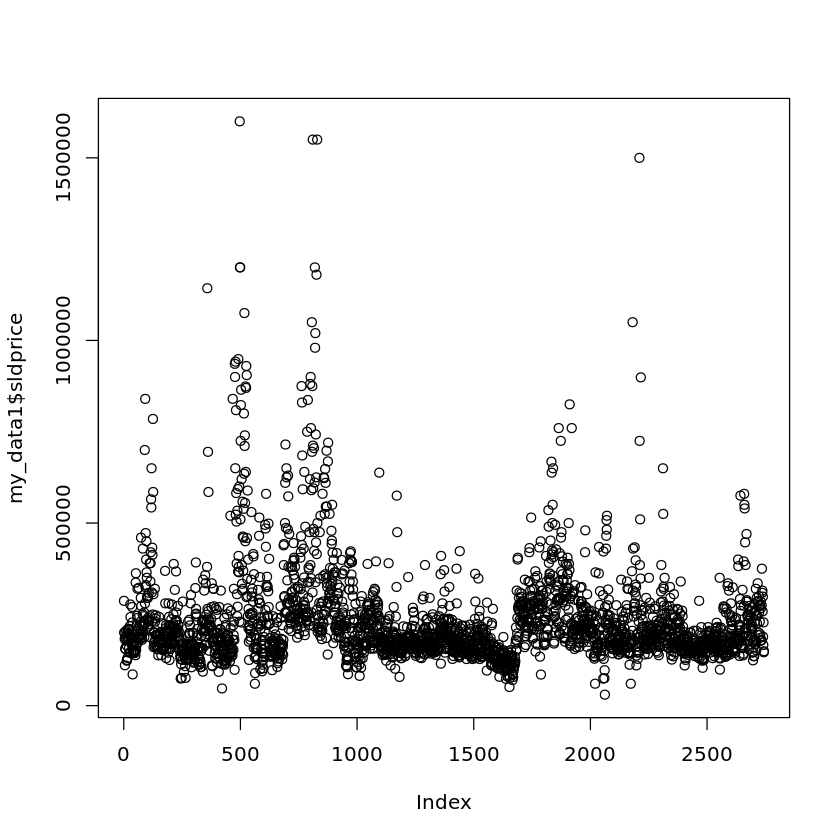

In [3]:
plot(my_data1$sldprice)

In [4]:
## removing NAs from the data 

new_data <- na.omit(my_data1)

Now to the actual work. Just like in the description example, we are going to use all the features to create the random forest. Since regression analysis makes sense with the **importance** value, we need to include this keyword.   


Q1. Just like in the example, can you model the data for selling price, including all of the variables and with the "importance" parameter set to true and print out the fit?

In [5]:
## Your Answer Code Here: ##

fit1 <- randomForest(sldprice~hh_avinc+rooms+beds+sway_1+hway_1+d_cbd+detach+air_con+brick+bsmt_fin,data=new_data,importance=TRUE)

print(fit1)



Call:
 randomForest(formula = sldprice ~ hh_avinc + rooms + beds + sway_1 +      hway_1 + d_cbd + detach + air_con + brick + bsmt_fin, data = new_data,      importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 5202958884
                    % Var explained: 73.19


<div align="right">
<a href="#p1" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p1" class="collapse">
```
fit1 <- randomForest(sldprice~hh_avinc+rooms+beds+sway_1+hway_1+d_cbd+detach+air_con+brick+bsmt_fin,data=new_data,importance=TRUE)

print(fit1)
```
</div>

From the resulting fit, we understand that **3** variables are randomly selected at each tree node and the model can explain **~73%** of the variability in the data. You can learn more about the meaning of these values in a regression module.

Let us have a look at the importance factor. We can use the **type** keyword in the importance function to look at only the percentage increase in MSE.

Q2: Can you print out the importance factor, preferably rounded to two decimal places and comment on the values observed?

In [6]:
## Your Answer Code Here: ##

round(importance(fit1,type=1),2)


,%IncMSE
hh_avinc,66.86
rooms,44.45
beds,26.43
sway_1,19.34
hway_1,3.76
d_cbd,58.07
detach,24.92
air_con,24.61
brick,15.03
bsmt_fin,14.19


<div align="right">
<a href="#p2" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p2" class="collapse">
```
round(importance(fit1,type=1),2)
```
</div>

The important deciding factors for housing prices are the average household income (hh_avinc), the distance to the centre of town (d_cbd), and the number of rooms (room).

When the **trees** are being created, there are instances, where one **branch** will be very similar to another **branch**. The algorithm computes a parameter called **proximity** to identify these instances. When we use this keyword while computing the model, the branches with similar characteristics, will be merged. 

To understand this, we will fit the model again with this keyword, print the model and look at the importance value as before.

Q3: Fit the model with same variables along with the **proximity** keyword, print the fit and importance factor. Comment and compare on the importance factors with the previous fit.

In [7]:
## Your Answer Code Here: ##

fit2 <- randomForest(sldprice~hh_avinc+rooms+beds+sway_1+hway_1+d_cbd+detach+air_con+brick+bsmt_fin,data=new_data,proximity=TRUE,action=na.omit,importance=TRUE)
print(fit2)
round(importance(fit2,type=1),2)



Call:
 randomForest(formula = sldprice ~ hh_avinc + rooms + beds + sway_1 +      hway_1 + d_cbd + detach + air_con + brick + bsmt_fin, data = new_data,      proximity = TRUE, action = na.omit, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 3

          Mean of squared residuals: 5266007648
                    % Var explained: 72.86


,%IncMSE
hh_avinc,62.06
rooms,51.16
beds,26.97
sway_1,20.97
hway_1,5.04
d_cbd,58.94
detach,24.50
air_con,25.37
brick,13.12
bsmt_fin,16.43


<div align="right">
<a href="#p3" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p3" class="collapse">
```
fit2 <- randomForest(sldprice~hh_avinc+rooms+beds+sway_1+hway_1+d_cbd+detach+air_con+brick+bsmt_fin,data=new_data,proximity=TRUE,action=na.omit,importance=TRUE)
print(fit2)
round(importance(fit2,type=1),2)
```
</div>

Although both models predict the average house hold income to  be the most important deciding factor on housing prices, the importance of the distance to centre of town and the number of rooms differ significantly. 

Also from the % variation explained, the second model is slightly better in terms of the fit to the data.   
These small variations can make a noticeable difference when we are using these models for predicting future housing prices. 

Now, let us plot these two models to see how the errors evolved during the process. 

Q4: Divide the plot area into two and simply plot the individual fits and comment on  your observation.

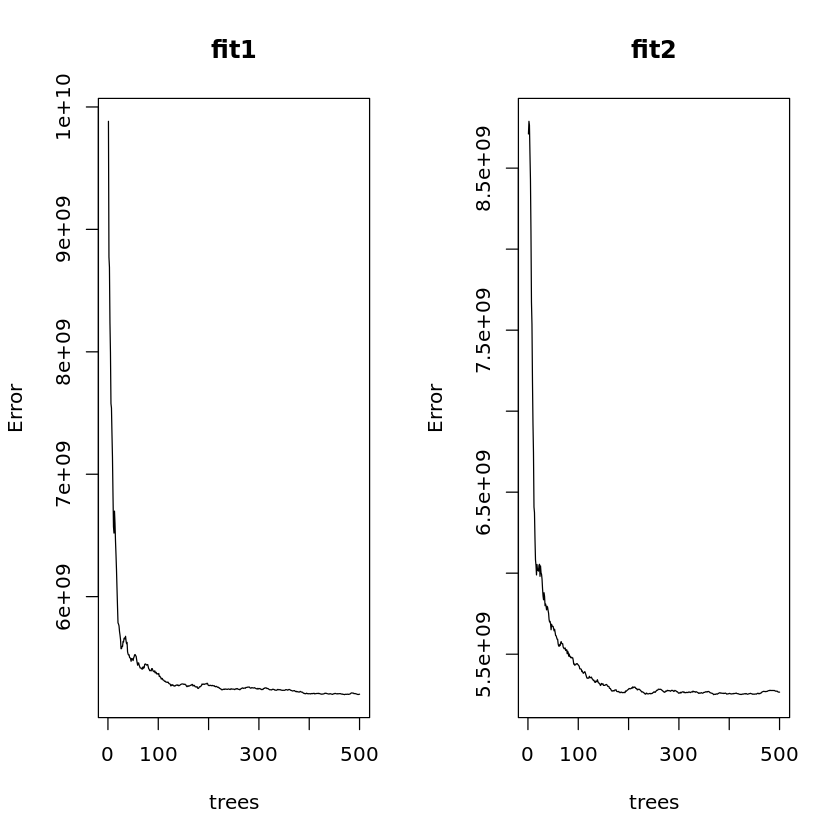

In [8]:
## Your Answer Code Here: ##

par(mfrow=c(1,2))
    plot(fit1)
plot(fit2)


<div align="right">
<a href="#p4" class="btn btn-default" data-toggle="collapse">Click here for the solution</a>
</div>
<div id="p4" class="collapse">
```
par(mfrow=c(1,2))
    plot(fit1)
plot(fit2)

```
</div>

The errors decrease almost exponentially with the increase in the number of trees. However, it is also interesting to note that the range of errors differ between the two models. This gives us an helpful clue in understanding how the underlying algorithm works, w.r.t, the **proximity** keyword.

It is important to understand that there will be differences each time you run the same forest with the same parameter, due to the random nature of the algorithm. Hence, the percentages may not match every time. 

Now that you have learnt how to use random forest algorithm for both classification of data as well as in regression analysis, it is time for you to try these techniques with your own datasets. Best wishes!!

## Want to learn more?

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: [SPSS Modeler for Mac users](https://cocl.us/ML0151EN_SPSSMod_mac) and [SPSS Modeler for Windows users](https://cocl.us/ML0151EN_SPSSMod_win)

Also, you can use Data Science Experience to run these notebooks faster with bigger datasets. Data Science Experience is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, DSX enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of DSX users today with a free account at [Data Science Experience](https://cocl.us/ML0151EN_DSX)

### Thanks for completing this lesson!

Notebook created by: Vino Sangaralingam

<hr>
Copyright &copy; 2017 [IBM Cognitive Class](https://cognitiveclass.ai/?utm_source=ML0151&utm_medium=lab&utm_campaign=cclab). This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/).